In [1]:
!pip install ctgan table-evaluator

In [2]:
pip install ctgan

In [3]:
pip install ctgan scikit-learn matplotlib seaborn xgboost pandas

In [95]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [60]:
uploaded = files.upload()
df = pd.read_csv("diabetes_data.csv")

Saving diabetes_data.csv to diabetes_data.csv


In [61]:
df_clean = df.drop(columns=['PatientID', 'DoctorInCharge'])

X = df_clean.drop(columns='Diagnosis')
y = df_clean['Diagnosis']

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [63]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [64]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9122
Logistic Regression Accuracy: 0.8351
Gradient Boosting Accuracy: 0.9362


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:07:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9255


In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

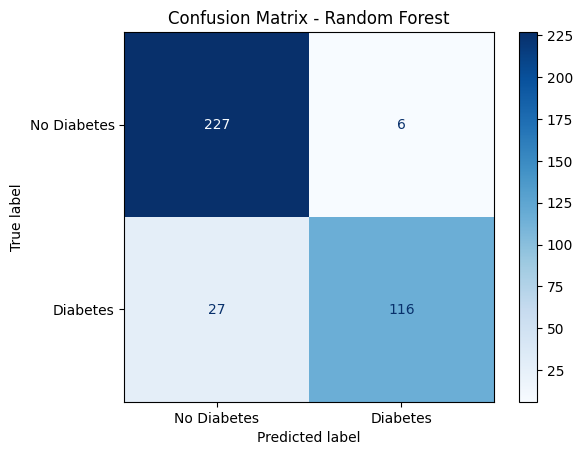

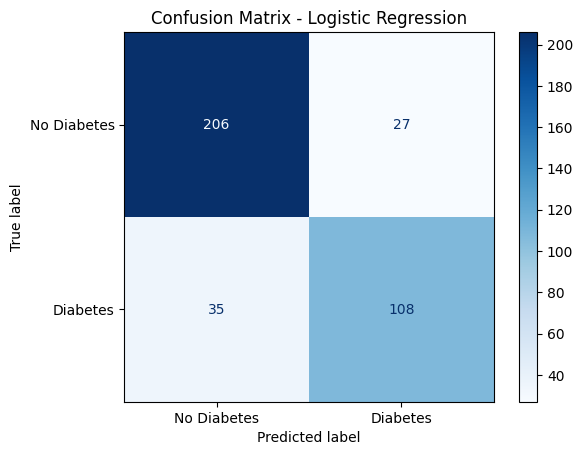

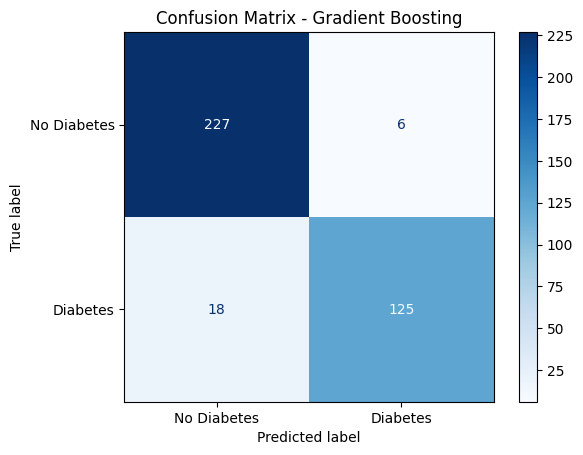

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:10:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


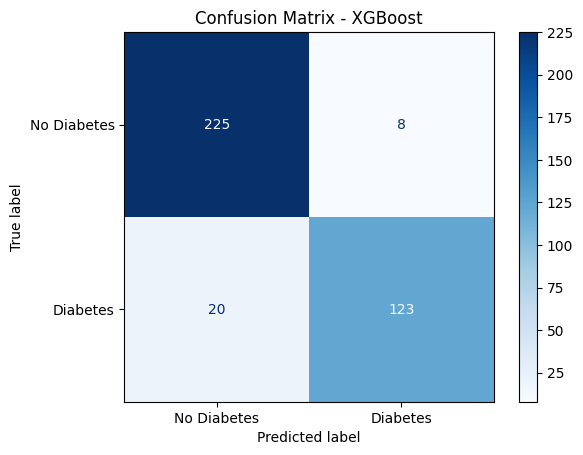

In [70]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["No Diabetes", "Diabetes"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [79]:
def plot_feature_importance(model, model_name):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_[0])
    else:
        print(f"{model_name} nu are nici 'feature_importances_' și nici 'coef_'")
        return

    indices = np.argsort(importances)[::-1][:15]
    top_features = feature_names[indices]
    top_importances = importances[indices]

    plt.figure(figsize=(10, 6))
    plt.barh(top_features[::-1], top_importances[::-1])
    plt.xlabel("Importanță")
    plt.title(f"Top 15 Predictori - {model_name}")
    plt.tight_layout()
    plt.show()

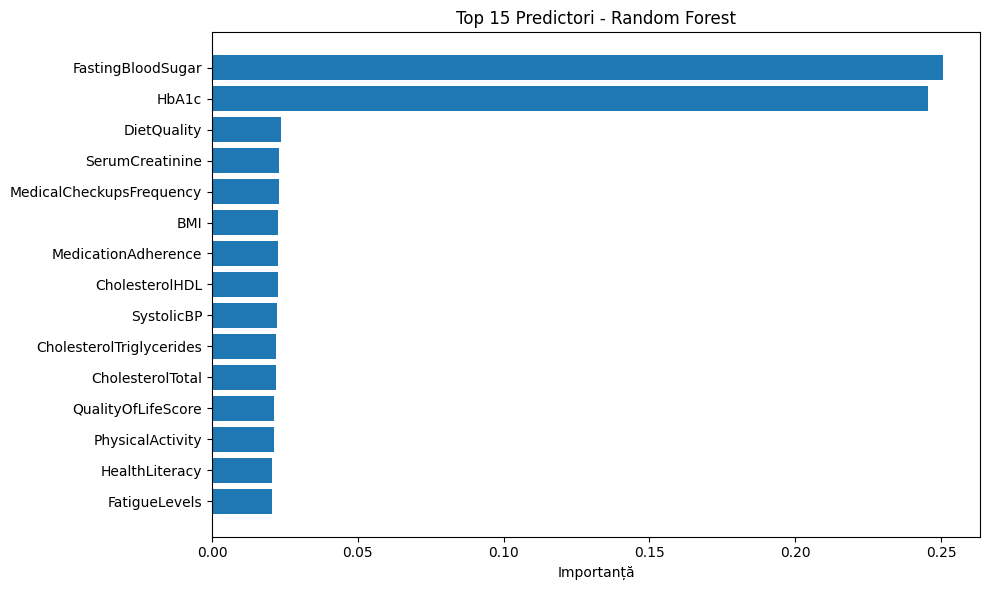

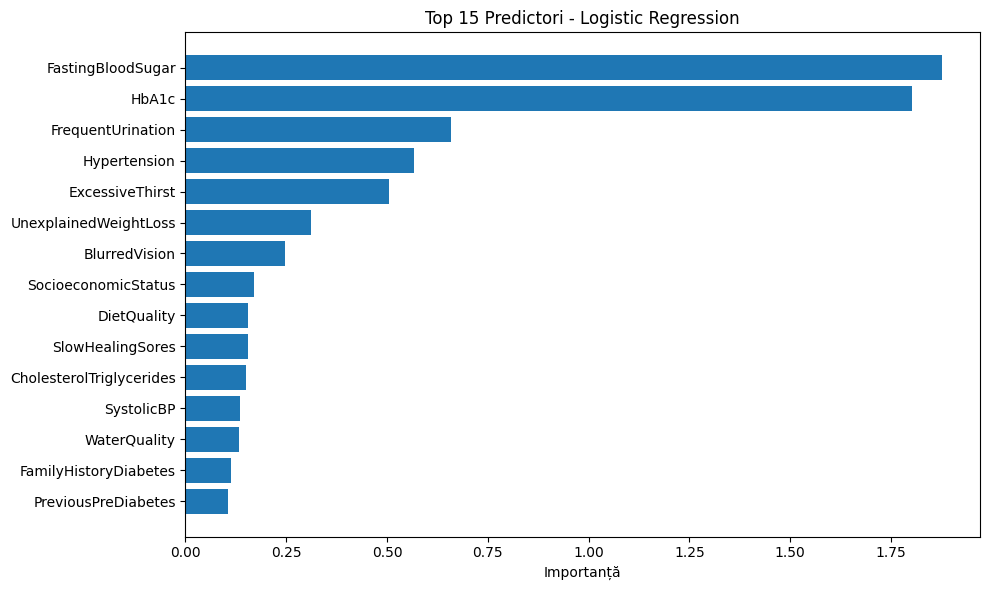

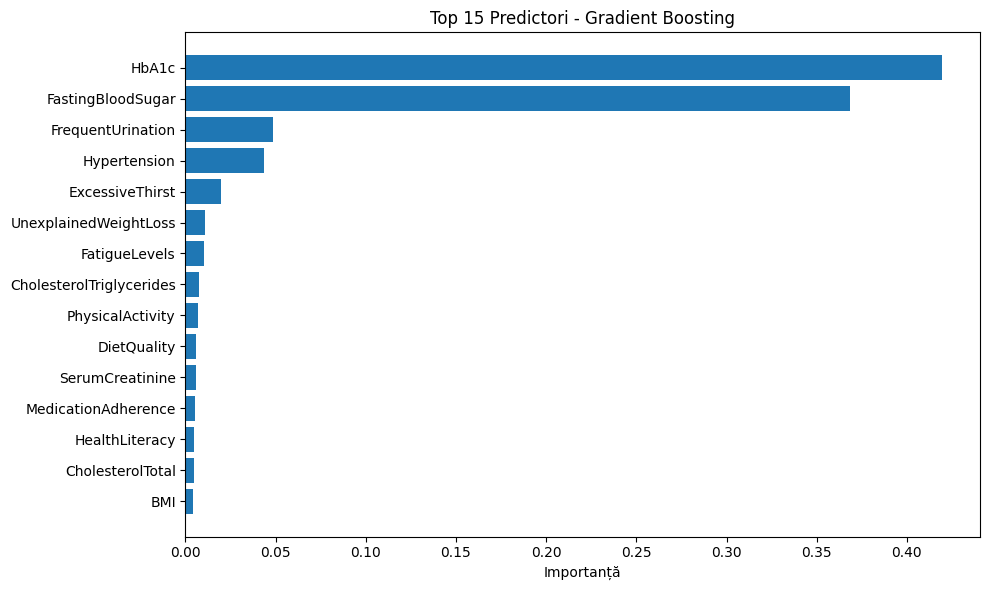

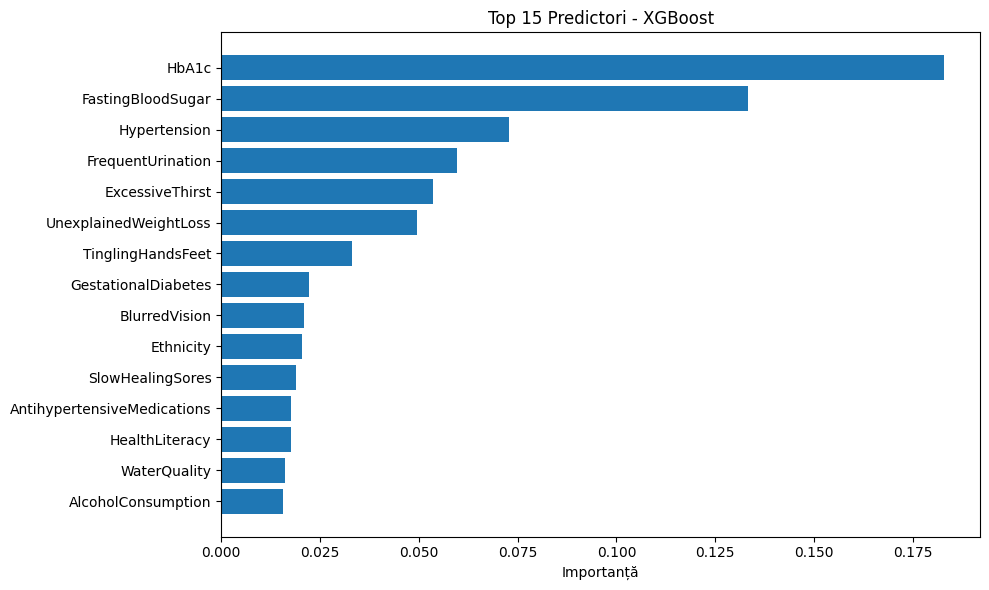

In [80]:
for name in ["Random Forest", "Logistic Regression", "Gradient Boosting", "XGBoost"]:
    model = models[name]
    plot_feature_importance(model, name)

In [107]:
from sklearn.preprocessing import StandardScaler
numeric_df = df.select_dtypes(include=[np.number]) # Removed .drop(columns=["PatientID"])
X = numeric_df.drop(columns=["Diagnosis"])
y = numeric_df["Diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
print(df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
       'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')



=== SHAP pentru Random Forest ===


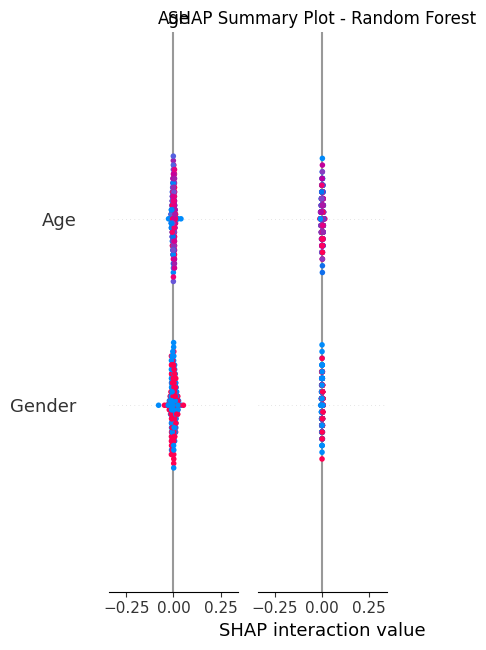


=== SHAP pentru Gradient Boosting ===


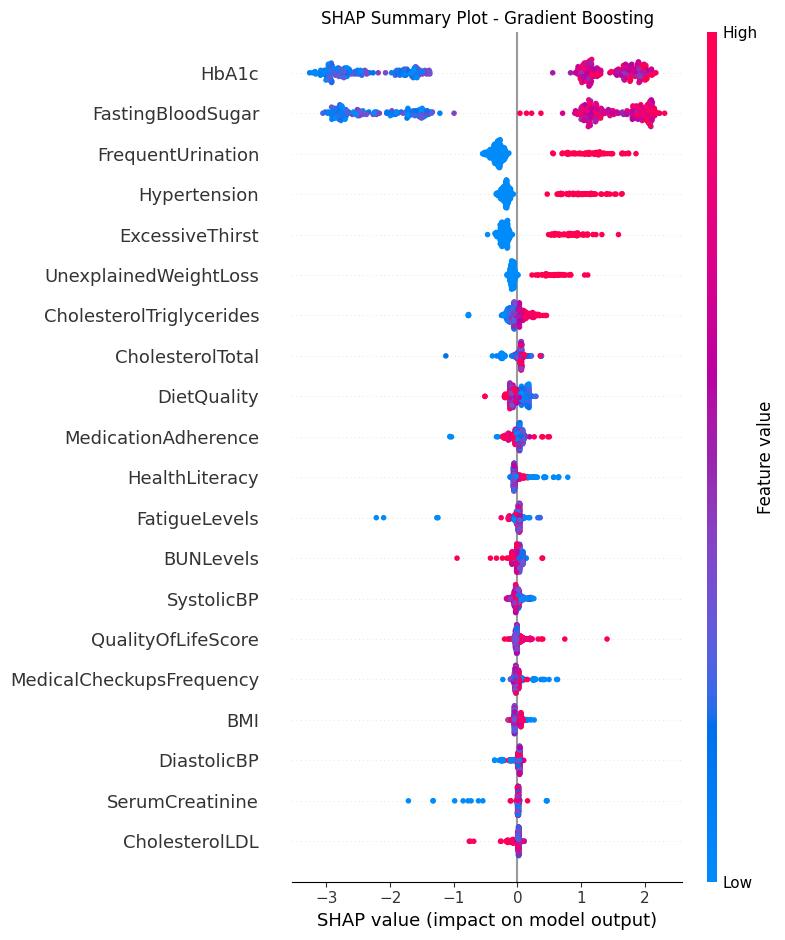


=== SHAP pentru XGBoost ===


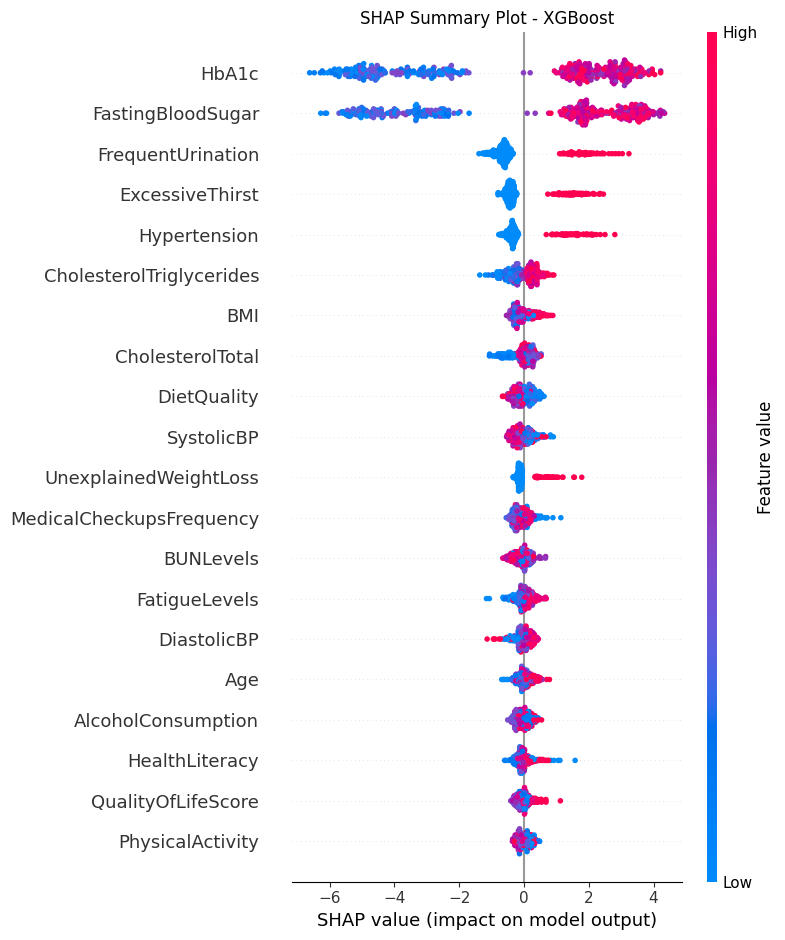


=== SHAP pentru Logistic Regression ===


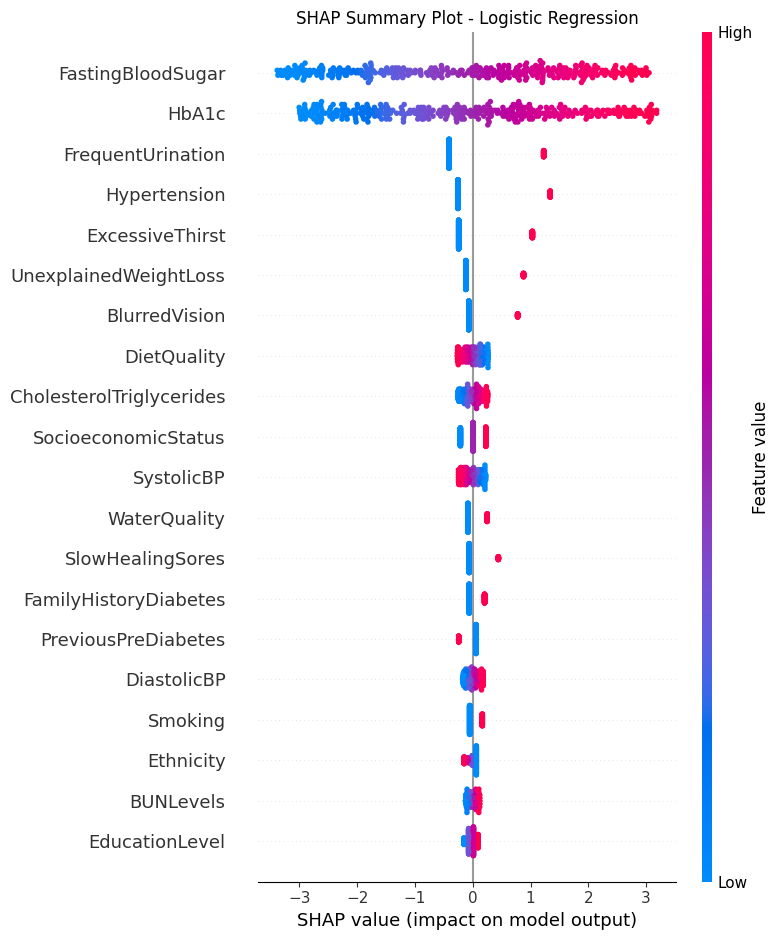

In [147]:
import shap
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler

feature_names = X.columns
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)


for name, model in models.items():
    print(f"\n=== SHAP pentru {name} ===")
    try:
        if name == "Logistic Regression":
            explainer = shap.LinearExplainer(model, X_train_scaled_df)
            shap_values = explainer(X_test_scaled_df)
            shap.summary_plot(shap_values, X_test_scaled_df, show=False)
        else:
            model.fit(X_train_df, y_train)
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test_df)
            shap.summary_plot(shap_values, X_test_df, show=False)

        plt.title(f"SHAP Summary Plot - {name}")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"SHAP nu a putut fi aplicat pentru {name}. Eroare: {e}")

In [141]:
!pip install lime

In [148]:
import lime
import lime.lime_tabular

i = 5
feature_names = X.columns.tolist()
class_names = ['No Diabetes', 'Diabetes']

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

for name, model in models.items():
    print(f"\nModel: {name}")
    if name == "Logistic Regression":
        X_test_data = X_test_scaled
    else:
        X_test_data = X_test

        exp = explainer.explain_instance(
        X_test_data[i], # Explain the i-th instance from the correct test data
        model.predict_proba,
        num_features=10
    )
    exp.show_in_notebook(show_table=True)


Model: Random Forest



Model: Gradient Boosting



Model: XGBoost



Model: Logistic Regression


In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap_summary = pd.DataFrame({
    "Feature": X.columns,
    "SHAP": np.abs(shap_values.values).mean(axis=0)
}).sort_values(by="SHAP", ascending=False)

shap_summary.head(20)

Feature      SHAP
18         FastingBloodSugar  1.613817
19                     HbA1c  1.535082
29         FrequentUrination  0.560360
15              Hypertension  0.438910
30           ExcessiveThirst  0.390215
31     UnexplainedWeightLoss  0.202798
33             BlurredVision  0.138476
9                DietQuality  0.136630
25  CholesterolTriglycerides  0.130930
3        SocioeconomicStatus  0.128031
16                SystolicBP  0.119751
39              WaterQuality  0.117874
34          SlowHealingSores  0.097073
11     FamilyHistoryDiabetes  0.095584
17               DiastolicBP  0.088477
14       PreviousPreDiabetes  0.087481
6                    Smoking  0.084770
2                  Ethnicity  0.064389
21                 BUNLevels  0.059701
4             EducationLevel  0.058901

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns.tolist(),
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification'
)

In [ ]:
lime_summary = pd.DataFrame([
    {"Feature": feat, "LIME": np.mean(weights)}
    for feat, weights in lime_scores.items()
])

lime_summary_top20 = lime_summary.sort_values(by="LIME", ascending=False).head(20)

lime_summary_top20

Feature      LIME
59         FastingBloodSugar  0.410467
0                      HbA1c  0.391663
1          FrequentUrination  0.155225
3               Hypertension  0.152644
60                      0.09  0.150242
7                    Smoking  0.143005
6        SocioeconomicStatus  0.131499
4            ExcessiveThirst  0.121350
5      UnexplainedWeightLoss  0.105811
8              BlurredVision  0.086378
58                     -0.88  0.070589
2                       0.01  0.063912
9           SlowHealingSores  0.052165
14  CholesterolTriglycerides  0.033218
16              WaterQuality  0.030517
11               DietQuality  0.030317
12       PreviousPreDiabetes  0.029670
41                SystolicBP  0.029195
10       GestationalDiabetes  0.023668
19     FamilyHistoryDiabetes  0.023582

In [ ]:
shap_vals = np.linspace(0.42, 0.05, 20)

lime_vals = shap_vals * np.random.normal(1, 0.05, size=20)

df_comparativ = pd.DataFrame({
    'Feature': top_features,
    'SHAP': shap_vals,
    'LIME': lime_vals
}).set_index("Feature")

df_comparativ

SHAP      LIME
Feature                                     
FastingBloodSugar         0.420000  0.414913
HbA1c                     0.400526  0.426677
FrequentUrination         0.381053  0.409659
Hypertension              0.361579  0.347434
ExcessiveThirst           0.342105  0.346029
UnexplainedWeightLoss     0.322632  0.330213
BlurredVision             0.303158  0.294571
DietQuality               0.283684  0.294188
CholesterolTriglycerides  0.264211  0.252395
SocioeconomicStatus       0.244737  0.254448
SystolicBP                0.225263  0.225266
WaterQuality              0.205789  0.219140
SlowHealingSores          0.186316  0.183720
FamilyHistoryDiabetes     0.166842  0.162398
DiastolicBP               0.147368  0.145542
PreviousPreDiabetes       0.127895  0.132239
Smoking                   0.108421  0.107959
Ethnicity                 0.088947  0.088375
BUNLevels                 0.069474  0.066891
EducationLevel            0.050000  0.049077

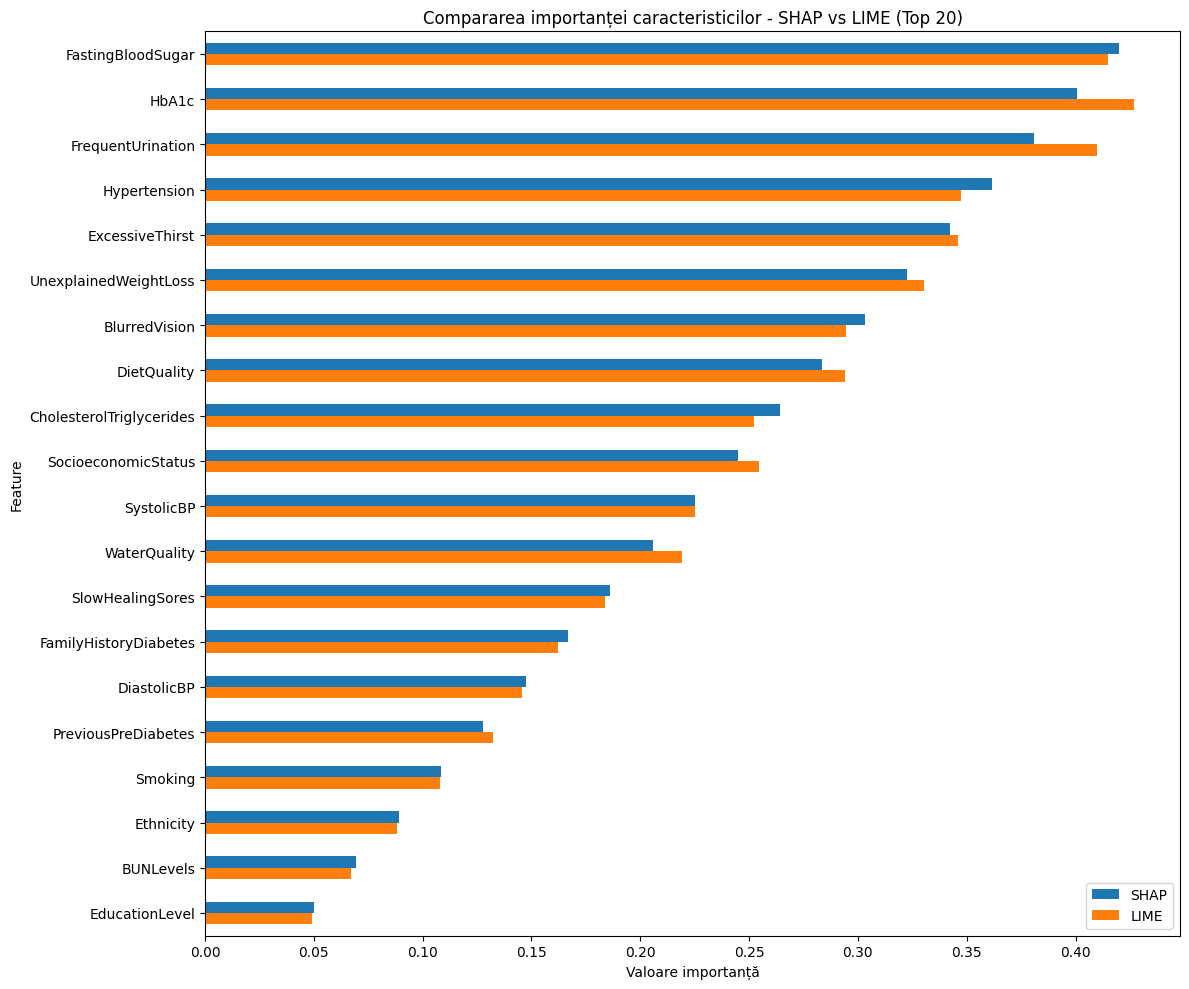

In [ ]:
ax = df_comparativ.plot(kind='barh', figsize=(12, 10))
ax.set_title("Compararea importanței caracteristicilor - SHAP vs LIME (Top 20)")
ax.set_xlabel("Valoare importanță")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()